In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess the data

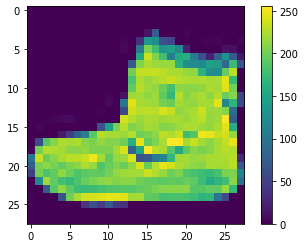

In [11]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [13]:
X_train, X_test = X_train/255, X_test/255

In [14]:
y_train[0]

9

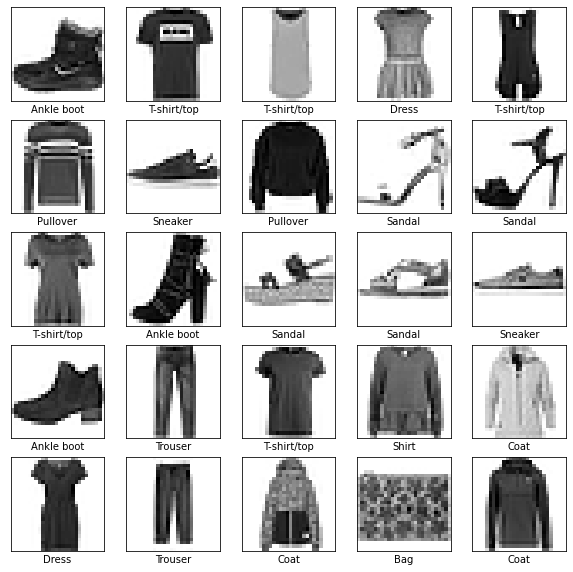

In [15]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Sequential Model

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6281 - accuracy: 0.7853
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3830 - accuracy: 0.8626
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3432 - accuracy: 0.8744
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3172 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2959 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2767 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2693 - accuracy: 0.8993
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2549 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2413 - accuracy: 0.9115
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nTest accuracy:{}\nTest loss:{}".format(test_acc, test_loss))

313/313 - 1s - loss: 0.3495 - accuracy: 0.8818

Test accuracy:0.8817999958992004
Test loss:0.34949713945388794


In [20]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [21]:
prediction = probability_model.predict(X_test)

In [22]:
prediction[0]

array([7.3655531e-09, 9.8342938e-11, 4.3351378e-07, 6.6880231e-11,
       1.6160241e-08, 2.1830034e-04, 2.8312718e-07, 9.9879391e-03,
       7.5730732e-08, 9.8979294e-01], dtype=float32)

In [23]:
np.argmax(prediction[0])

9

In [24]:
class_names[np.argmax(prediction[0])]

'Ankle boot'

In [25]:
def plot_image(pred_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    
    pred_label = np.argmax(pred_array)
    if pred_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[pred_label], 100*np.max(pred_array), class_names[true_label]), color=color)

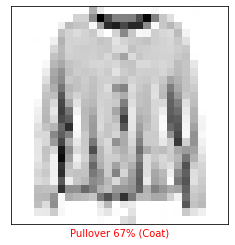

In [26]:
i = 25
plot_image(prediction[i], y_test[i], X_test[i])

In [27]:
def plot_value_array(pred_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), pred_array, color = "#777777")
    plt.ylim([0, 1])
    pred_label = np.argmax(pred_array)

    thisplot[pred_label].set_color('red')
    thisplot[true_label].set_color('blue')

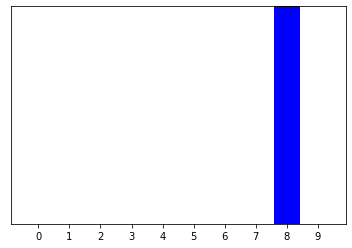

In [28]:
i = 30
plot_value_array(prediction[i], y_test[i])

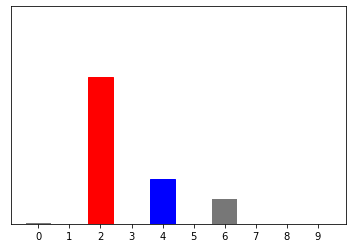

In [29]:
i = 25
plot_value_array(prediction[i], y_test[i])

In [30]:
def plot_pred(i):
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plot_image(prediction[i], y_test[i], X_test[i])
    plt.subplot(1, 2, 2)
    plot_value_array(prediction[i], y_test[i])
    plt.show()

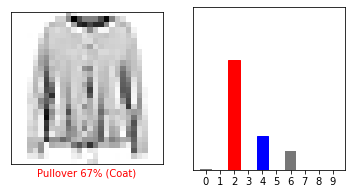

In [31]:
plot_pred(25)

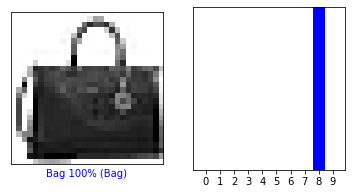

In [32]:
plot_pred(30)

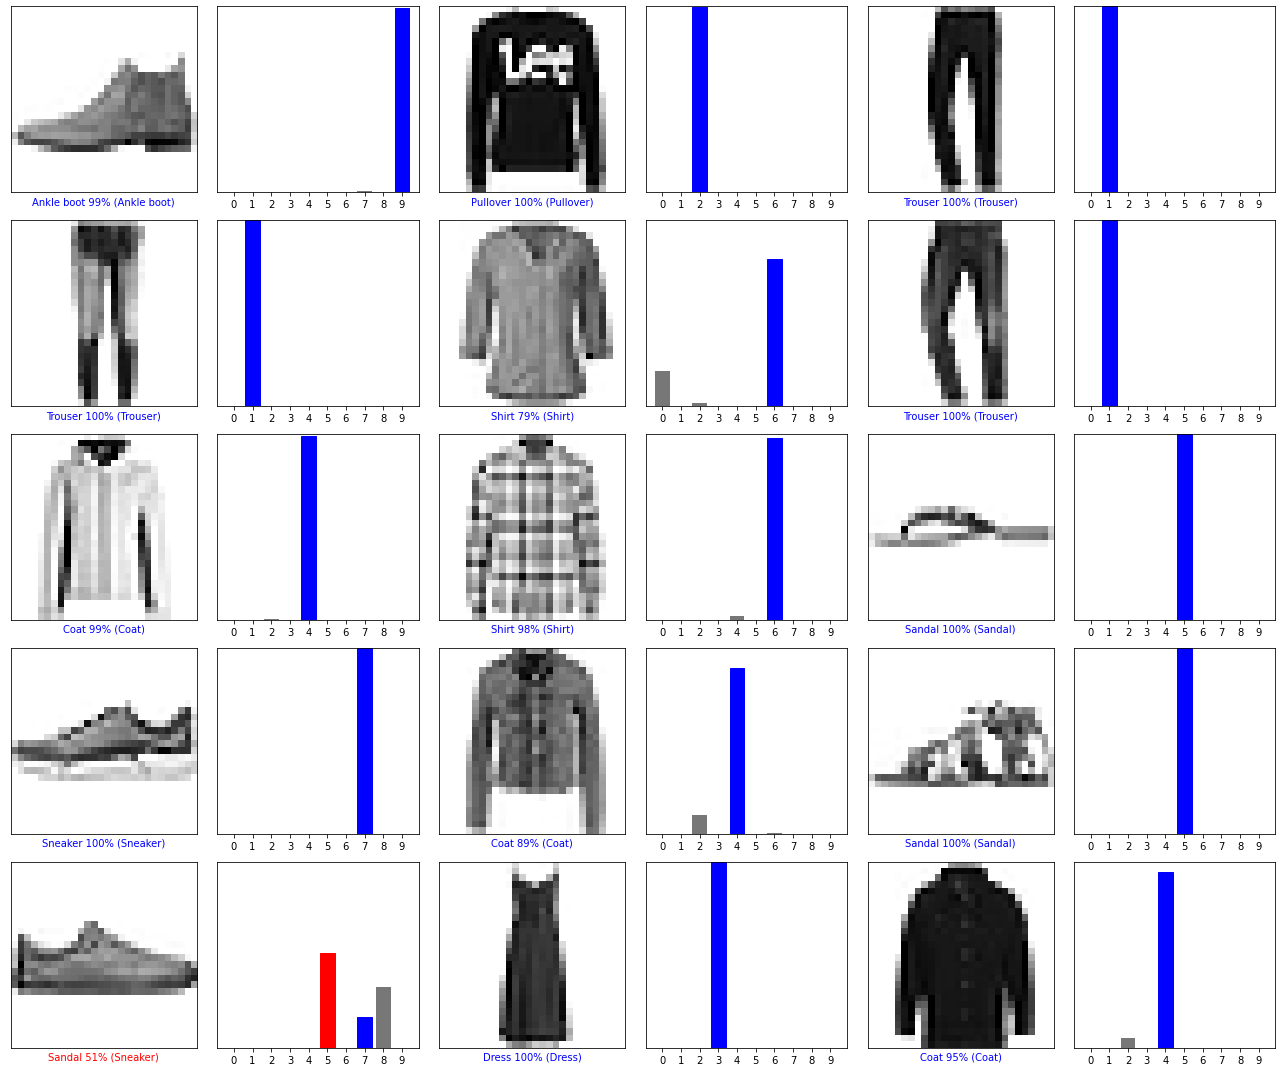

In [33]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(3*2*num_cols, 3*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(prediction[i], y_test[i], X_test[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(prediction[i], y_test[i])
plt.tight_layout()
plt.show()

In [34]:
single_img = X_test[1]
single_img.shape

(28, 28)

In [35]:
single_img = (np.expand_dims(single_img, 0))
single_img.shape

(1, 28, 28)

In [36]:
pred_singal = probability_model.predict(single_img)

In [37]:
pred_singal

array([[1.0799799e-05, 5.3875844e-13, 9.9907982e-01, 1.1275755e-12,
        5.8392627e-04, 7.9550547e-11, 3.2535265e-04, 4.2922314e-19,
        5.4463221e-09, 6.0636594e-15]], dtype=float32)

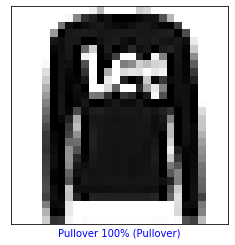

In [38]:
plot_image(pred_singal[0], y_test[1], X_test[1])

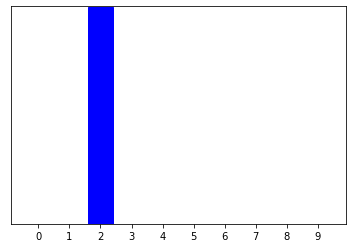

In [39]:
plot_value_array(pred_singal[0], y_test[1])